# Tensorflow 2 实现线性回归

## 低阶 API 实现

### 生成随机数据集

In [1]:
# %% 引入依赖项
from matplotlib import pyplot as plt
import tensorflow as tf
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# %% 参数初始化
TRUE_W = 3.0
TRUE_b = 2.0
NUM_SAMPLES = 100

In [3]:
# %% 生成数据
X = tf.random.normal(shape=[NUM_SAMPLES, 1]).numpy()
noise = tf.random.normal(shape=[NUM_SAMPLES, 1]).numpy()
y = X * TRUE_W + TRUE_b + noise

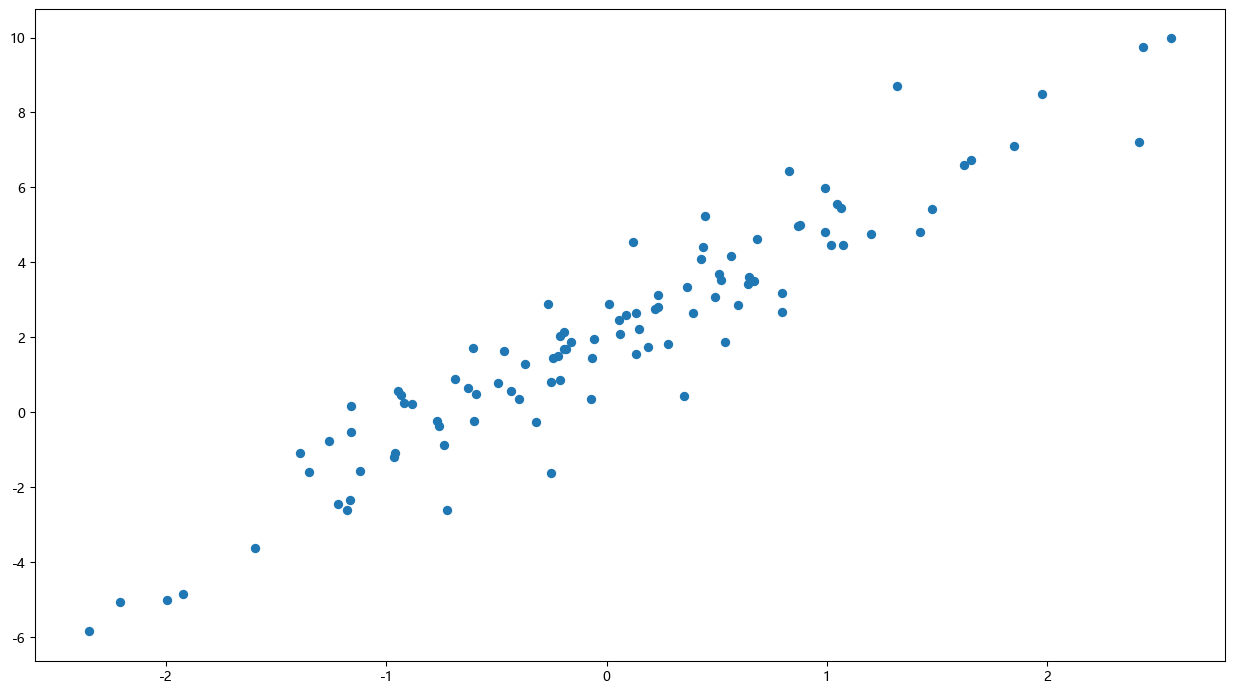

In [4]:
# %% 展示图像
plt.figure(figsize=(16, 9), dpi=96)
plt.scatter(X, y)
plt.show()

### 自定义模型

In [5]:
class Model(object):
    """ 线性回归模型 """
    def __init__(self):
        self.W = tf.Variable(tf.random.uniform([1]))
        self.b = tf.Variable(tf.random.uniform([1]))

    def __call__(self, x):
        return self.W * x + self.b

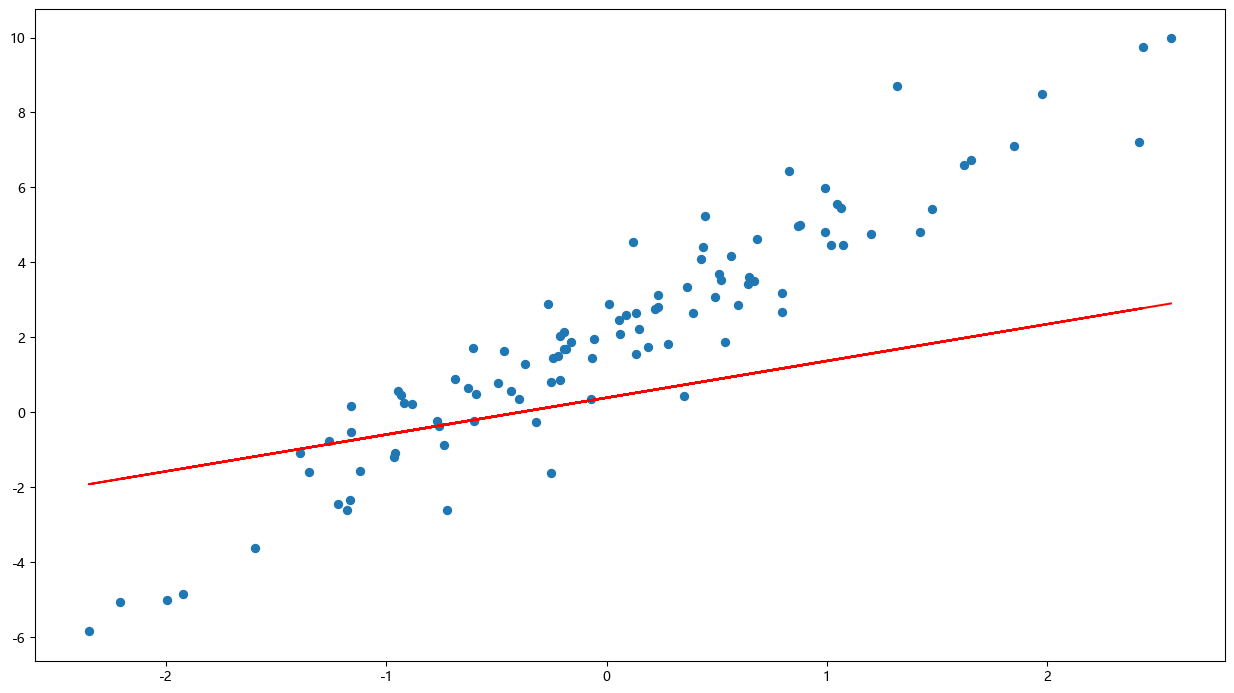

In [6]:
# %% 可视化初始模型
model = Model()
plt.figure(figsize=(16, 9), dpi=96)
plt.scatter(X, y)
plt.plot(X, model(X), 'red')
plt.show()

In [7]:
def loss_fn(model, x, y):
    """ 损失函数 - 均方误差 """
    y_ = model(x)
    return tf.reduce_mean(tf.square(y_ - y))

In [8]:
# %% 迭代学习 - 梯度下降法
EPOCHS, LEARNING_RATE = 30, 0.1
for epoch in range(EPOCHS):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, X, y)
    dW, db = tape.gradient(loss, [model.W, model.b])
    model.W.assign_sub(LEARNING_RATE * dW)
    model.b.assign_sub(LEARNING_RATE * db)
    print("Epoch [{}/{}], loss [{:.3f}], "
          "W/b [{:.3f}/{:.3f}]"
          .format(epoch, EPOCHS, loss, float(model.W.numpy()), float(model.b.numpy())))

Epoch [0/30], loss [7.528], W/b [1.379/0.715]
Epoch [1/30], loss [5.146], W/b [1.696/0.975]
Epoch [2/30], loss [3.633], W/b [1.950/1.182]
Epoch [3/30], loss [2.671], W/b [2.153/1.346]
Epoch [4/30], loss [2.061], W/b [2.315/1.476]
Epoch [5/30], loss [1.673], W/b [2.444/1.579]
Epoch [6/30], loss [1.426], W/b [2.548/1.661]
Epoch [7/30], loss [1.269], W/b [2.631/1.726]
Epoch [8/30], loss [1.170], W/b [2.697/1.778]
Epoch [9/30], loss [1.107], W/b [2.750/1.818]
Epoch [10/30], loss [1.066], W/b [2.792/1.851]
Epoch [11/30], loss [1.041], W/b [2.826/1.877]
Epoch [12/30], loss [1.025], W/b [2.853/1.897]
Epoch [13/30], loss [1.014], W/b [2.875/1.913]
Epoch [14/30], loss [1.008], W/b [2.892/1.926]
Epoch [15/30], loss [1.004], W/b [2.906/1.936]
Epoch [16/30], loss [1.001], W/b [2.917/1.944]
Epoch [17/30], loss [0.999], W/b [2.926/1.951]
Epoch [18/30], loss [0.998], W/b [2.933/1.956]
Epoch [19/30], loss [0.997], W/b [2.938/1.960]
Epoch [20/30], loss [0.997], W/b [2.943/1.963]
Epoch [21/30], loss [0.

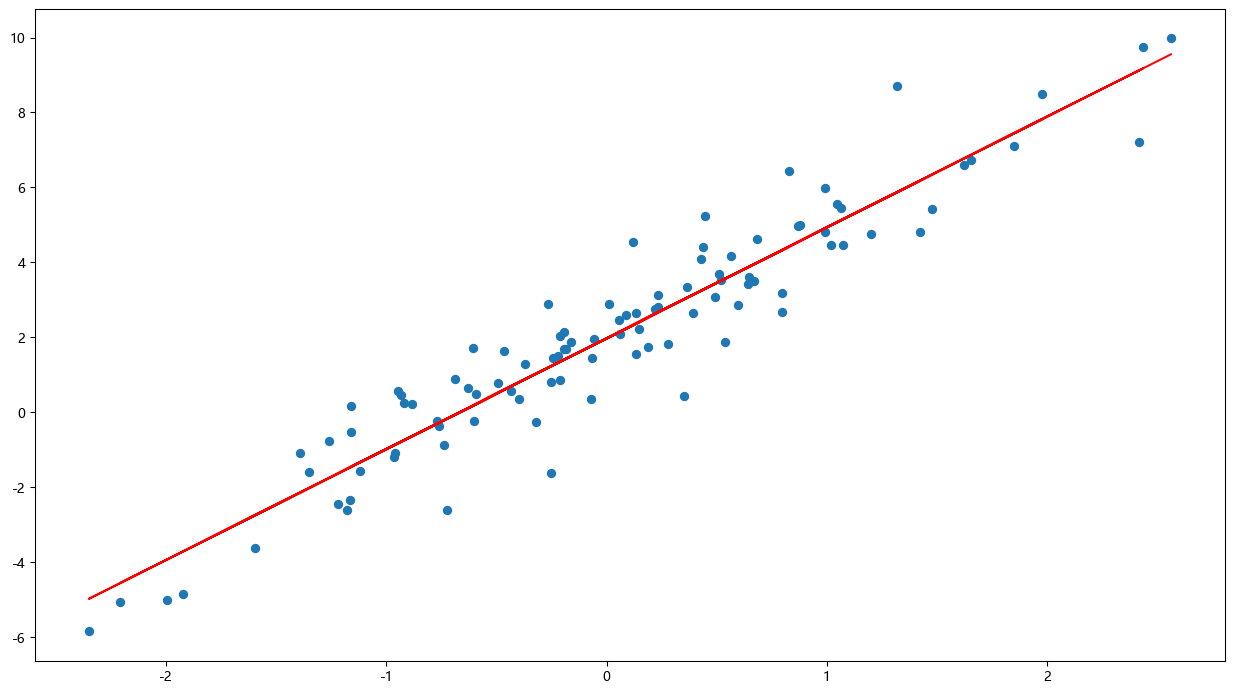

In [9]:
# %% 可视化回归直线
plt.figure(figsize=(16, 9), dpi=96)
plt.scatter(X, y)
plt.plot(X, model(X), 'red')
plt.show()

## 高阶 API 实现

使用 `tf.keras.layers.Dense` 线性全连接层进行线性回归

In [10]:
# %% Keras 模型层
model = tf.keras.layers.Dense(units=1)
model

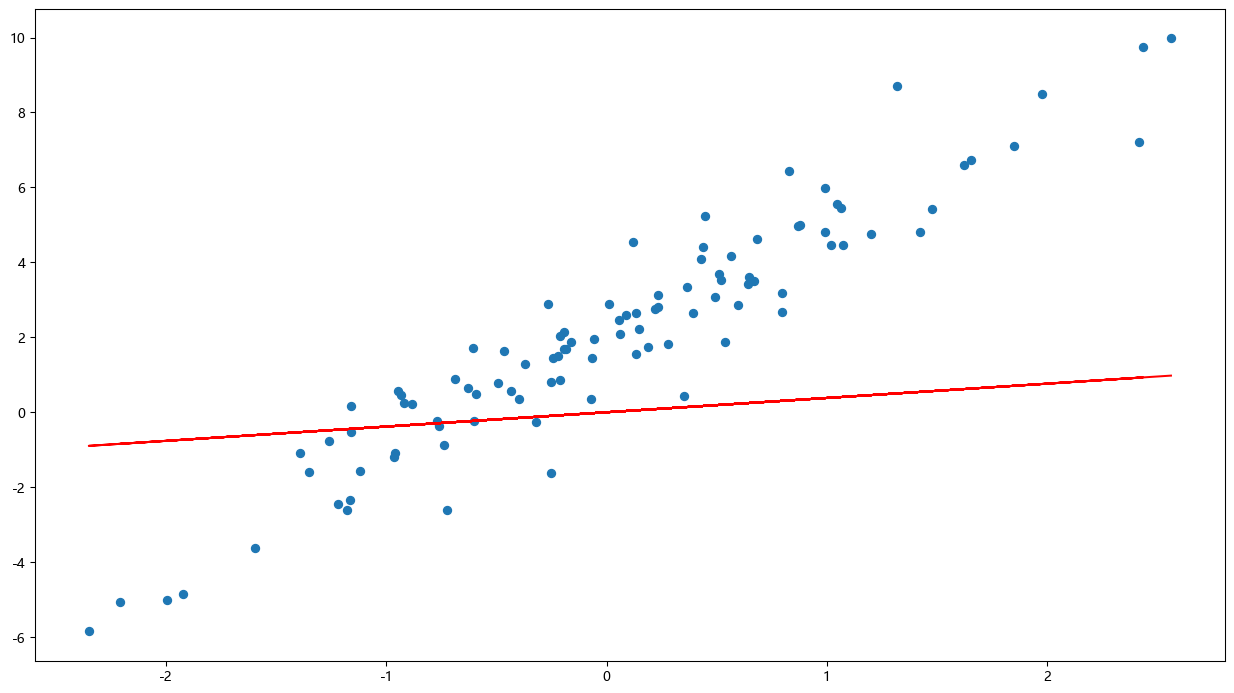

In [11]:
# %% 可视化初始参数
plt.figure(figsize=(16, 9), dpi=96)
plt.scatter(X, y)
plt.plot(X, model(X), 'red')
plt.show()

In [12]:
# %% 打印初始参数
model.variables

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.3816086]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [14]:
# %% 传统梯度跟踪
EPOCHS, LEARNING_RATE = 30, 0.002
for epoch in range(EPOCHS):
    with tf.GradientTape() as tape:
        y_ = model(X)
        # 均方误差
        loss = tf.reduce_sum(tf.keras.losses.mean_squared_error(y, y_))
    grads = tape.gradient(loss, model.variables)
    # 梯度下降优化器
    optimizer = tf.keras.optimizers.SGD(LEARNING_RATE)
    optimizer.apply_gradients(zip(grads, model.variables))
    print("Epoch [{}/{}], loss [{:.3f}]".format(epoch, EPOCHS, loss))

Epoch [0/30], loss [1169.754]
Epoch [1/30], loss [477.711]
Epoch [2/30], loss [233.261]
Epoch [3/30], loss [146.881]
Epoch [4/30], loss [116.344]
Epoch [5/30], loss [105.545]
Epoch [6/30], loss [101.723]
Epoch [7/30], loss [100.371]
Epoch [8/30], loss [99.892]
Epoch [9/30], loss [99.722]
Epoch [10/30], loss [99.662]
Epoch [11/30], loss [99.640]
Epoch [12/30], loss [99.633]
Epoch [13/30], loss [99.630]
Epoch [14/30], loss [99.629]
Epoch [15/30], loss [99.629]
Epoch [16/30], loss [99.629]
Epoch [17/30], loss [99.628]
Epoch [18/30], loss [99.628]
Epoch [19/30], loss [99.628]
Epoch [20/30], loss [99.628]
Epoch [21/30], loss [99.628]
Epoch [22/30], loss [99.628]
Epoch [23/30], loss [99.628]
Epoch [24/30], loss [99.628]
Epoch [25/30], loss [99.628]
Epoch [26/30], loss [99.628]
Epoch [27/30], loss [99.628]
Epoch [28/30], loss [99.628]
Epoch [29/30], loss [99.628]


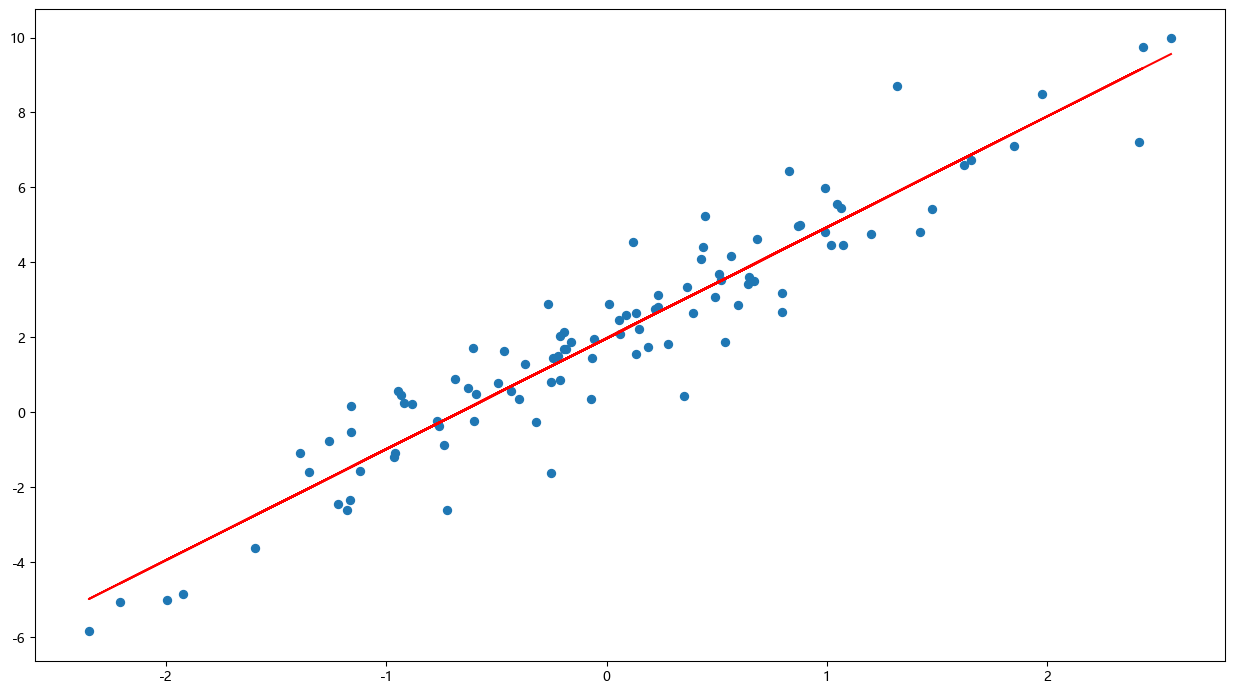

In [15]:
# %% 可视化拟合效果
plt.figure(figsize=(16, 9), dpi=96)
plt.scatter(X, y)
plt.plot(X, model(X), 'red')
plt.show()

## Keras API 实现

In [17]:
# 构建层序模型
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [18]:
# %% 编译与训练
model.compile(optimizer='sgd', loss='mse')
model.fit(X, y, steps_per_epoch=100)

100/100 [==============================] - 0s 971us/step - loss: 2.8076


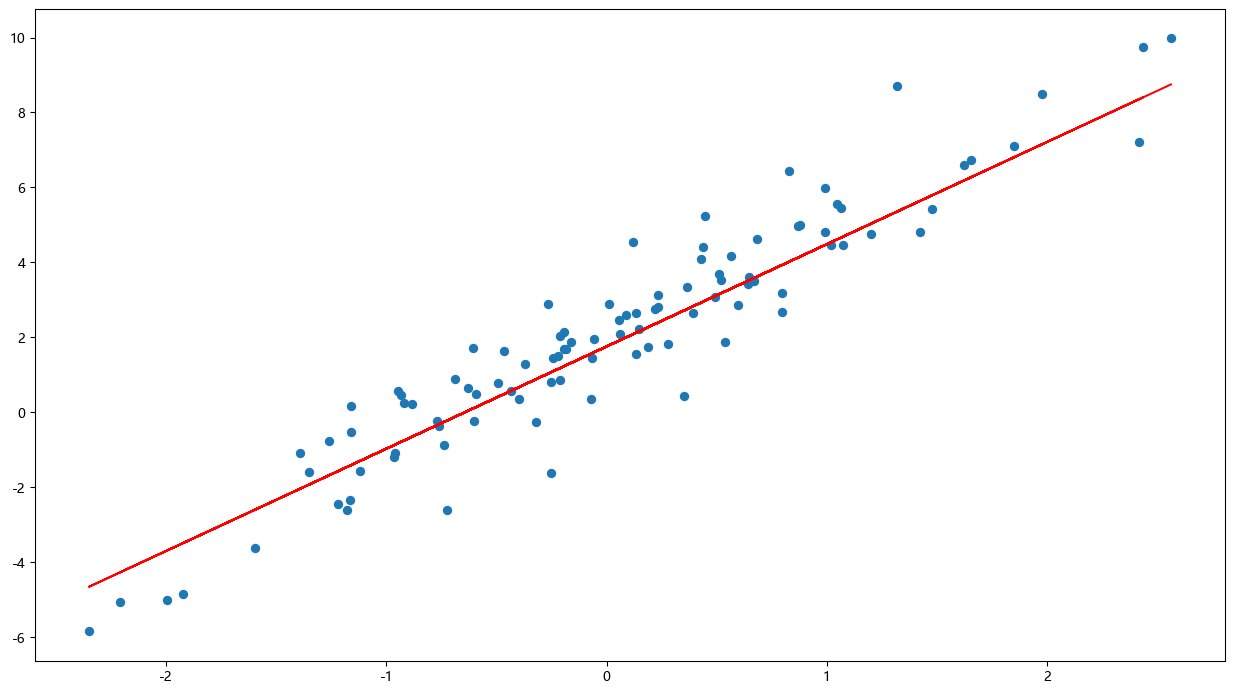

In [19]:
# %% 可视化拟合结果
plt.figure(figsize=(16, 9), dpi=96)
plt.scatter(X, y)
plt.plot(X, model(X), 'red')
plt.show()

## Tensorflow 1.x 实现

In [20]:
# %% 关闭 v2 特性
from tensorflow.compat import v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [21]:
X_train = tf.placeholder(tf.float32)    # 定义占位符张量
y_train = tf.placeholder(tf.float32)
W = tf.Variable(tf.random.normal([1]))  # 初始化参数
b = tf.Variable(tf.random.normal([1]))

LEARNING_RATE = 0.001  # 学习率

y_train_ = W * X_train + b  # 线性函数
loss = tf.reduce_mean(tf.square(y_train_ - y_train))  # 平方损失函数
optimizer = tf.train.GradientDescentOptimizer(
    LEARNING_RATE).minimize(loss)  # 梯度下降优化损失函数

EPOCHS = 1000  # 迭代次数
with tf.Session() as sess: # 启动会话
    tf.global_variables_initializer().run()  # 初始化全局变量
    for epoch in range(EPOCHS):  # 迭代优化
        sess.run(optimizer, feed_dict={X_train:X, y_train:y})
    final_weight = sess.run(W)  # 最终参数
    final_bias = sess.run(b)

print(final_weight, final_bias)

[2.4580472] [1.6558275]


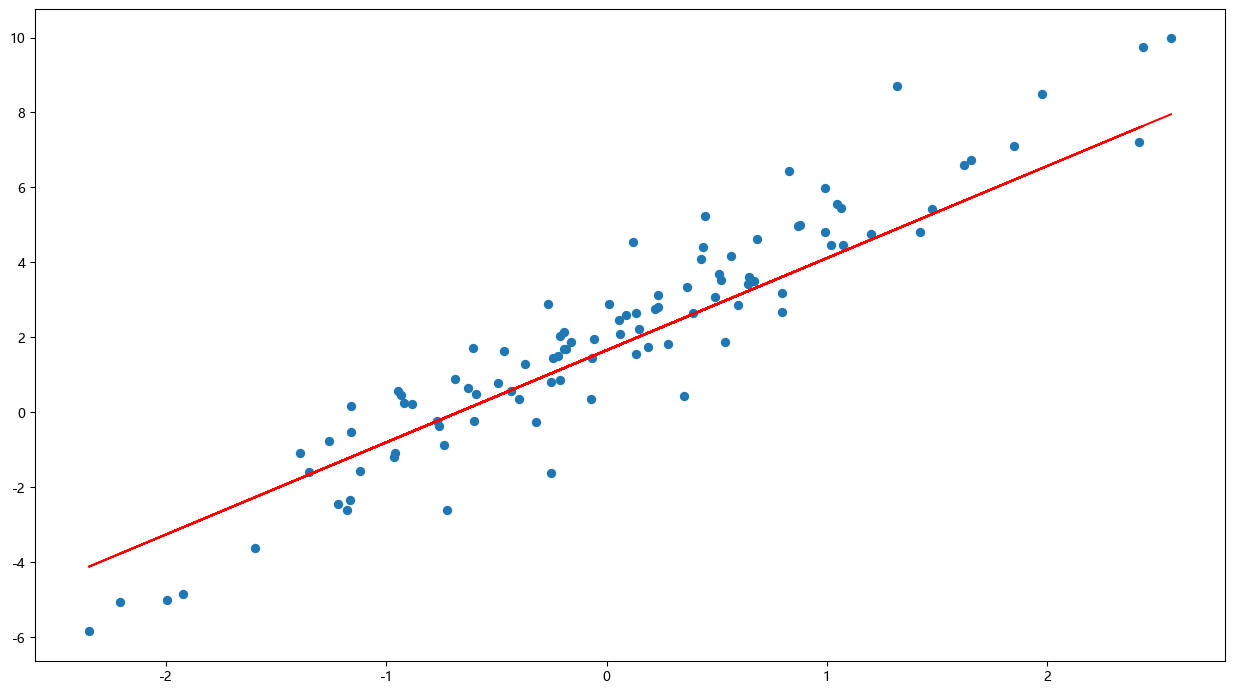

In [22]:
preds = final_weight * X + final_bias  # 计算预测值
plt.figure(figsize=(16, 9), dpi=96)
plt.scatter(X, y)
plt.plot(X, preds, c='r')
plt.show()